<a href="https://colab.research.google.com/github/laurelkeys/machine-learning/blob/master/assignment-4/Trajectories.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import cv2
import gym
import random
import numpy as np
from PIL import Image

In [0]:
# The 210x160 RGB Atari images are converted to grayscale and downsampled to 84x84
# ref.: https://github.com/hill-a/stable-baselines/blob/master/stable_baselines/common/atari_wrappers.py#L172
INP_IMAGE_SHAPE = (84, 84)
INP_IMAGE_SIZE  = np.prod(INP_IMAGE_SHAPE)

In [0]:
# environments used to generate images
ENV_IDS = ["Breakout-v0", "Pong-v0"]

In [0]:
SAVE_DIR = "data"

IMAGES_TO_GENERATE = 10000

MAX_IMAGES_PER_ENV_INSTANCE = 5

In [0]:
def save_as_image(observation, save_dir, img_name, prefix="img_"):
    # downscaling the image
    im_array = cv2.resize(observation, INP_IMAGE_SHAPE) # TODO test tf.image.resize
    im = Image.fromarray(im_array, 'RGB')
    imname = "{}{}.png".format(prefix, img_name)
    im.save(os.path.join(save_dir, imname))

In [0]:
# you can change the default values here
save_dir = SAVE_DIR
num_images = IMAGES_TO_GENERATE

In [0]:
os.makedirs(save_dir, exist_ok=True)

In [0]:
envs = [gym.make(env_id) for env_id in ENV_IDS]

In [0]:
for env_id, env in zip(ENV_IDS, envs):
    print(env_id)
    
    env.reset()
    i, current_env_images = 0, 0
    
    while i < num_images:
        # take a random action (sampled from the action space)
        obs, _, is_done, _ = env.step(env.action_space.sample())
        if np.mean(obs) > 0.01:
            save_as_image(obs, save_dir, f"{env_id}_{i}")
            current_env_images += 1
            i += 1
        else:
            print("a")
            continue
        if is_done or current_env_images % MAX_IMAGES_PER_ENV_INSTANCE == 0:
            current_env_images = 0
            env = random.choice(envs)
            env.reset()

Breakout-v0
Pong-v0


In [0]:
# ref.: https://github.com/satwikkansal/atari_gan/blob/master/generate_data.py

In [0]:
!ls -U data/ | head -4

img_Breakout-v0_7146.png
img_Pong-v0_2010.png
img_Pong-v0_3908.png
img_Breakout-v0_5384.png


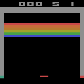

In [0]:
from IPython.display import Image
Image('data/img_Breakout-v0_7146.png')

In [0]:
# TODO download data/